In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [3]:
#Conectar con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/USFX/SIS420-IA/datasets/parkinsons_updrs.data.csv')

In [5]:
print(data)

      index  subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  \
0         0         1   72    0     5.6431       28.199       34.398   
1         1         1   72    0    12.6660       28.447       34.894   
2         2         1   72    0    19.6810       28.695       35.389   
3         3         1   72    0    25.6470       28.905       35.810   
4         4         1   72    0    33.6420       29.187       36.375   
...     ...       ...  ...  ...        ...          ...          ...   
5870   5870        42   61    0   142.7900       22.485       33.485   
5871   5871        42   61    0   149.8400       21.988       32.988   
5872   5872        42   61    0   156.8200       21.495       32.495   
5873   5873        42   61    0   163.7300       21.007       32.007   
5874   5874        42   61    0   170.7300       20.513       31.513   

      Jitter(%)  Jitter(Abs)  Jitter:RAP  ...  Shimmer(dB)  Shimmer:APQ3  \
0       0.00662     0.000034     0.00401  ...        0.230 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          5875 non-null   int64  
 1   subject#       5875 non-null   int64  
 2   age            5875 non-null   int64  
 3   sex            5875 non-null   int64  
 4   test_time      5875 non-null   float64
 5   motor_UPDRS    5875 non-null   float64
 6   total_UPDRS    5875 non-null   float64
 7   Jitter(%)      5875 non-null   float64
 8   Jitter(Abs)    5875 non-null   float64
 9   Jitter:RAP     5875 non-null   float64
 10  Jitter:PPQ5    5875 non-null   float64
 11  Jitter:DDP     5875 non-null   float64
 12  Shimmer        5875 non-null   float64
 13  Shimmer(dB)    5875 non-null   float64
 14  Shimmer:APQ3   5875 non-null   float64
 15  Shimmer:APQ5   5875 non-null   float64
 16  Shimmer:APQ11  5875 non-null   float64
 17  Shimmer:DDA    5875 non-null   float64
 18  NHR     

In [7]:
columnas_eliminar = ['index', 'Jitter(Abs)', 'Jitter:RAP','Jitter:PPQ5','Jitter:DDP', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','Shimmer:APQ11','Shimmer:DDA' ]
data = data.drop(columnas_eliminar, axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subject#     5875 non-null   int64  
 1   age          5875 non-null   int64  
 2   sex          5875 non-null   int64  
 3   test_time    5875 non-null   float64
 4   motor_UPDRS  5875 non-null   float64
 5   total_UPDRS  5875 non-null   float64
 6   Jitter(%)    5875 non-null   float64
 7   Shimmer      5875 non-null   float64
 8   NHR          5875 non-null   float64
 9   HNR          5875 non-null   float64
 10  RPDE         5875 non-null   float64
 11  DFA          5875 non-null   float64
 12  PPE          5875 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 596.8 KB


In [9]:
# Lectura de Datos
columnas_seleccionadas = list(range(0, 5)) + list(range(6, 12))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 5]
m = y.size

In [10]:
print(X)
print('*'*25)
print(y)

      subject#  age  sex  test_time  motor_UPDRS  Jitter(%)  Shimmer  \
0            1   72    0     5.6431       28.199    0.00662  0.02565   
1            1   72    0    12.6660       28.447    0.00300  0.02024   
2            1   72    0    19.6810       28.695    0.00481  0.01675   
3            1   72    0    25.6470       28.905    0.00528  0.02309   
4            1   72    0    33.6420       29.187    0.00335  0.01703   
...        ...  ...  ...        ...          ...        ...      ...   
5870        42   61    0   142.7900       22.485    0.00406  0.01896   
5871        42   61    0   149.8400       21.988    0.00297  0.02315   
5872        42   61    0   156.8200       21.495    0.00349  0.02499   
5873        42   61    0   163.7300       21.007    0.00281  0.01484   
5874        42   61    0   170.7300       20.513    0.00282  0.01907   

           NHR     HNR     RPDE      DFA  
0     0.014290  21.640  0.41888  0.54842  
1     0.011112  27.183  0.43493  0.56477  
2     

In [11]:
#Podemos ver los valores de toda la fila
fila_deseada = 2

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[1.0000e+00 7.2000e+01 0.0000e+00 1.9681e+01 2.8695e+01 3.5389e+01
 4.8100e-03 1.6750e-02 2.0220e-02 2.3047e+01 4.6222e-01 5.4405e-01
 2.1014e-01]


In [12]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [13]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      subject#  age  sex  test_time  motor_UPDRS  Jitter(%)  Shimmer  \
0            1   72    0     5.6431       28.199    0.00662  0.02565   
1            1   72    0    12.6660       28.447    0.00300  0.02024   
2            1   72    0    19.6810       28.695    0.00481  0.01675   
3            1   72    0    25.6470       28.905    0.00528  0.02309   
4            1   72    0    33.6420       29.187    0.00335  0.01703   
...        ...  ...  ...        ...          ...        ...      ...   
5870        42   61    0   142.7900       22.485    0.00406  0.01896   
5871        42   61    0   149.8400       21.988    0.00297  0.02315   
5872        42   61    0   156.8200       21.495    0.00349  0.02499   
5873        42   61    0   163.7300       21.007    0.00281  0.01484   
5874        42   61    0   170.7300       20.513    0.00282  0.01907   

           NHR     HNR     RPDE      DFA  
0     0.014290  21.640  0.41888  0.54842  
1     0.011112  27.183  0.43493  0.56477  
2     

In [14]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [15]:
print(X)

[[ 1.         -1.65659628  0.81569539 ... -0.00920476 -1.21406557
  -1.47849968]
 [ 1.         -1.65659628  0.81569539 ...  1.28264969 -1.05511879
  -1.24788006]
 [ 1.         -1.65659628  0.81569539 ...  0.31871139 -0.78485974
  -1.5401393 ]
 ...
 [ 1.          1.65754564 -0.43136086 ...  0.78902751 -0.62937908
  -1.04885603]
 [ 1.          1.65754564 -0.43136086 ...  0.6391696   0.26914065
  -1.26903782]
 [ 1.          1.65754564 -0.43136086 ...  0.36812022  0.44175389
  -1.163249  ]]


In [16]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [17]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [28.82390272  0.6967966   0.71013061 -0.92866744  0.17643756  9.48647203
  0.09052298 -0.29304096 -0.22784374 -0.36057394  0.21037066 -0.44999792]
El total_escala_parkinson predecido es (usando el descenso por el gradiente): 37.2343


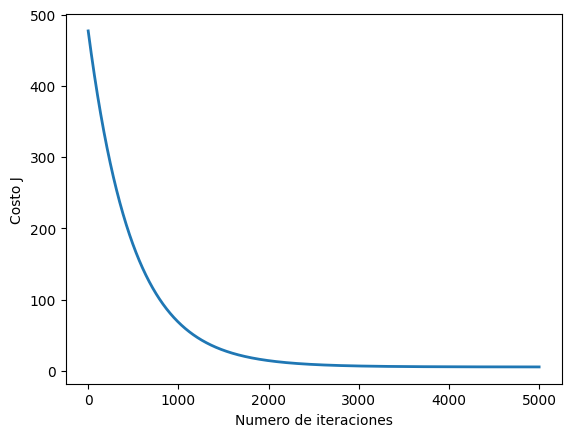

In [18]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un auto Ford en distintas caracteristicas
X_array = [1, 1, 72, 0,5.6431, 28.199, 0.00662, 0.02565, 0.01429, 21.640, 0.4188, 0.54842]
X_array[1:12] = (X_array[1:12] - mu) / sigma
total_escala_parkinson = np.dot(X_array, theta)   # Se debe cambiar esto

print('El total_escala_parkinson predecido es (usando el descenso por el gradiente): {:.4f}'.format(total_escala_parkinson))

In [19]:
# Generar un nuevo dataset con la columna movida
nuevo_dataset = data.copy()

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_dataset.to_csv('parkinsons_updrsnuevo.csv', index=False)

print("Archivo 'parkinsons_updrsnuevo.csv' creado exitosamente.")

Archivo 'parkinsons_updrsnuevo.csv' creado exitosamente.


In [20]:
#Carga de dataset
data = pd.read_csv('parkinsons_updrsnuevo.csv')

In [21]:
print(data)


      subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0            1   72    0     5.6431       28.199       34.398    0.00662   
1            1   72    0    12.6660       28.447       34.894    0.00300   
2            1   72    0    19.6810       28.695       35.389    0.00481   
3            1   72    0    25.6470       28.905       35.810    0.00528   
4            1   72    0    33.6420       29.187       36.375    0.00335   
...        ...  ...  ...        ...          ...          ...        ...   
5870        42   61    0   142.7900       22.485       33.485    0.00406   
5871        42   61    0   149.8400       21.988       32.988    0.00297   
5872        42   61    0   156.8200       21.495       32.495    0.00349   
5873        42   61    0   163.7300       21.007       32.007    0.00281   
5874        42   61    0   170.7300       20.513       31.513    0.00282   

      Shimmer       NHR     HNR     RPDE      DFA      PPE  
0     0.02565  0.014290  2

In [22]:
# Lectura de Datos
columnas_seleccionadas = list(range(0, 5)) + list(range(6, 12))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 5]
m = y.size

In [23]:
print(X)
print('*'*25)
print(y)

      subject#  age  sex  test_time  motor_UPDRS  Jitter(%)  Shimmer  \
0            1   72    0     5.6431       28.199    0.00662  0.02565   
1            1   72    0    12.6660       28.447    0.00300  0.02024   
2            1   72    0    19.6810       28.695    0.00481  0.01675   
3            1   72    0    25.6470       28.905    0.00528  0.02309   
4            1   72    0    33.6420       29.187    0.00335  0.01703   
...        ...  ...  ...        ...          ...        ...      ...   
5870        42   61    0   142.7900       22.485    0.00406  0.01896   
5871        42   61    0   149.8400       21.988    0.00297  0.02315   
5872        42   61    0   156.8200       21.495    0.00349  0.02499   
5873        42   61    0   163.7300       21.007    0.00281  0.01484   
5874        42   61    0   170.7300       20.513    0.00282  0.01907   

           NHR     HNR     RPDE      DFA  
0     0.014290  21.640  0.41888  0.54842  
1     0.011112  27.183  0.43493  0.56477  
2     

In [24]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [25]:
# importante que para usar m>n, evitar datos redundantes, no se normaliza
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [26]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 1, 72, 0,5.6431, 28.199, 0.00662, 0.02565, 0.01429, 21.640, 0.4188, 0.54842]
total_escala_parkinson = np.dot(X_array, theta)

print('total_escala_parkinson predecido): ${:.0f}'.format(total_escala_parkinson))

Theta calculado a partir de la ecuación de la normal: [ 2.37936569e+00  4.04657947e-02  6.70044700e-02 -1.79602274e+00
  2.54384674e-03  1.19840704e+00 -5.26131001e+00 -1.46102233e+01
 -2.18097678e-01 -7.53888046e-02  2.06966198e+00 -4.14714483e+00]
total_escala_parkinson predecido): $38
